In [26]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("../Data/Cleaned_Data.csv")
df

,Balance,Balance_Frequency,Purchases,One_Off_Purchases,Installments_Purchases,Cash_Advance,Purchases_Frequency,One_Off_Purchases_Frequency,Purchases_Installments_Frequency,Cash_Advance_Frequency,Cash_Advance_Trx,Purchases_Trx,Credit_Limit,Payments,Minimum_Payments,Prc_Full_Payment,Tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,0.000000,0.000000,6
8872,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8873,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8874,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [19]:
from sklearn.cluster import KMeans

kmeans_params = {"init": "random", "n_init": 10, "max_iter": 350, "random_state": 42}

inertia_values = [
    KMeans(n_clusters=k, **kmeans_params).fit(df).inertia_
    for k in range(1, 11)
]

In [20]:
from kneed import KneeLocator
k1 = KneeLocator(range(1, 11), inertia_values, curve="convex", direction="decreasing")
elbow_point = k1.elbow
print(f"The optimal number of clusters is: {elbow_point}")

The optimal number of clusters is: 3


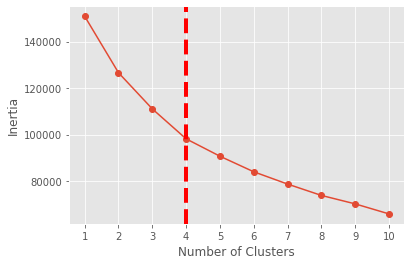

In [14]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot (range (1,11), inertia_values , marker = 'o')
plt.xticks (range (1, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia")
plt.axvline (x = elbow_point, color = "red", label = "axvline - full height",linewidth = 4, linestyle ="--")
plt.show ()

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 4)
kmeans = kmeans.fit (df)

centroids = kmeans.cluster_centers_
print (centroids)

clusters = kmeans.labels_
print (clusters)

[[ 3.31014716e+03  9.41540497e-01  1.58177491e+03  9.93218263e+02
   5.88865241e+02  2.07081198e+03  5.43071130e-01  3.22225564e-01
   3.84325518e-01  2.08451483e-01  5.65991379e+00  2.20681034e+01
   8.98196317e+03  2.85118037e+03  1.19728762e+03  1.39757287e-01
   1.17383621e+01]
 [ 4.78470985e+03  9.13974159e-01  1.05261089e+04  7.47757591e+03
   3.04869970e+03  5.45097870e+03  7.40346636e-01  5.89188992e-01
   5.94337879e-01  2.31314750e-01  9.26515152e+00  8.40984848e+01
   1.25003788e+04  1.79814232e+04  2.36027925e+03  3.31751189e-01
   1.18409091e+01]
 [ 4.45124178e+03  9.85645947e-01  1.16328816e+03  1.68416053e+02
   9.94872105e+02  1.00375484e+03  4.99401868e-01  4.90430000e-02
   4.70295053e-01  8.89154474e-02  2.97368421e+00  2.24210526e+01
   4.68815789e+03  1.63663139e+03  2.73619541e+04 -5.55111512e-17
   1.19210526e+01]
 [ 8.64612395e+02  8.61110159e-01  6.03125039e+02  3.12281682e+02
   2.91148506e+02  5.00525065e+02  4.65878804e-01  1.53711665e-01
   3.50866580e-01  

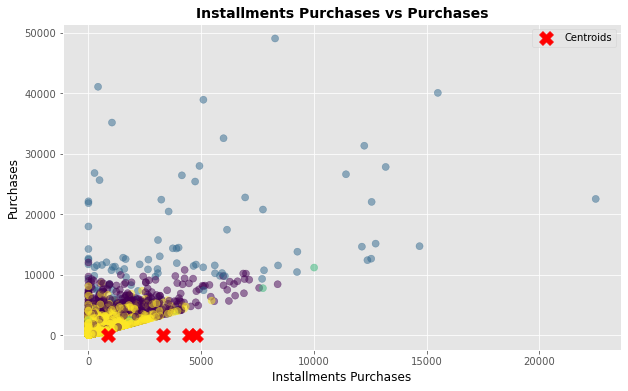

In [25]:
df_with_clusters = df.copy()
df_with_clusters['Clusters'] = kmeans.labels_
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(df["Installments_Purchases"], df["Purchases"], 
                     c=kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, marker='X', label='Centroids')

ax.set_title("Installments Purchases vs Purchases", weight="bold", color="black", fontsize=14)
ax.set_xlabel("Installments Purchases", color="black", fontsize=12)
ax.set_ylabel("Purchases", color="black", fontsize=12)

ax.legend()
ax.grid(True)

plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='count'>

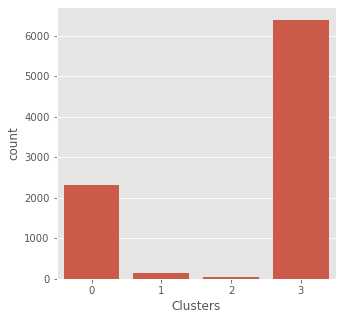

In [27]:
plt.figure (figsize = (5 , 5))
sns.countplot (x=df_with_clusters["Clusters"])

/tmp/ipykernel_118189/1971559246.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot (x='Balance' , y='Purchases' , hue = 'Clusters' , palette=['blue','green','red'], data=df_with_clusters)


Text(0, 0.5, 'Payments')

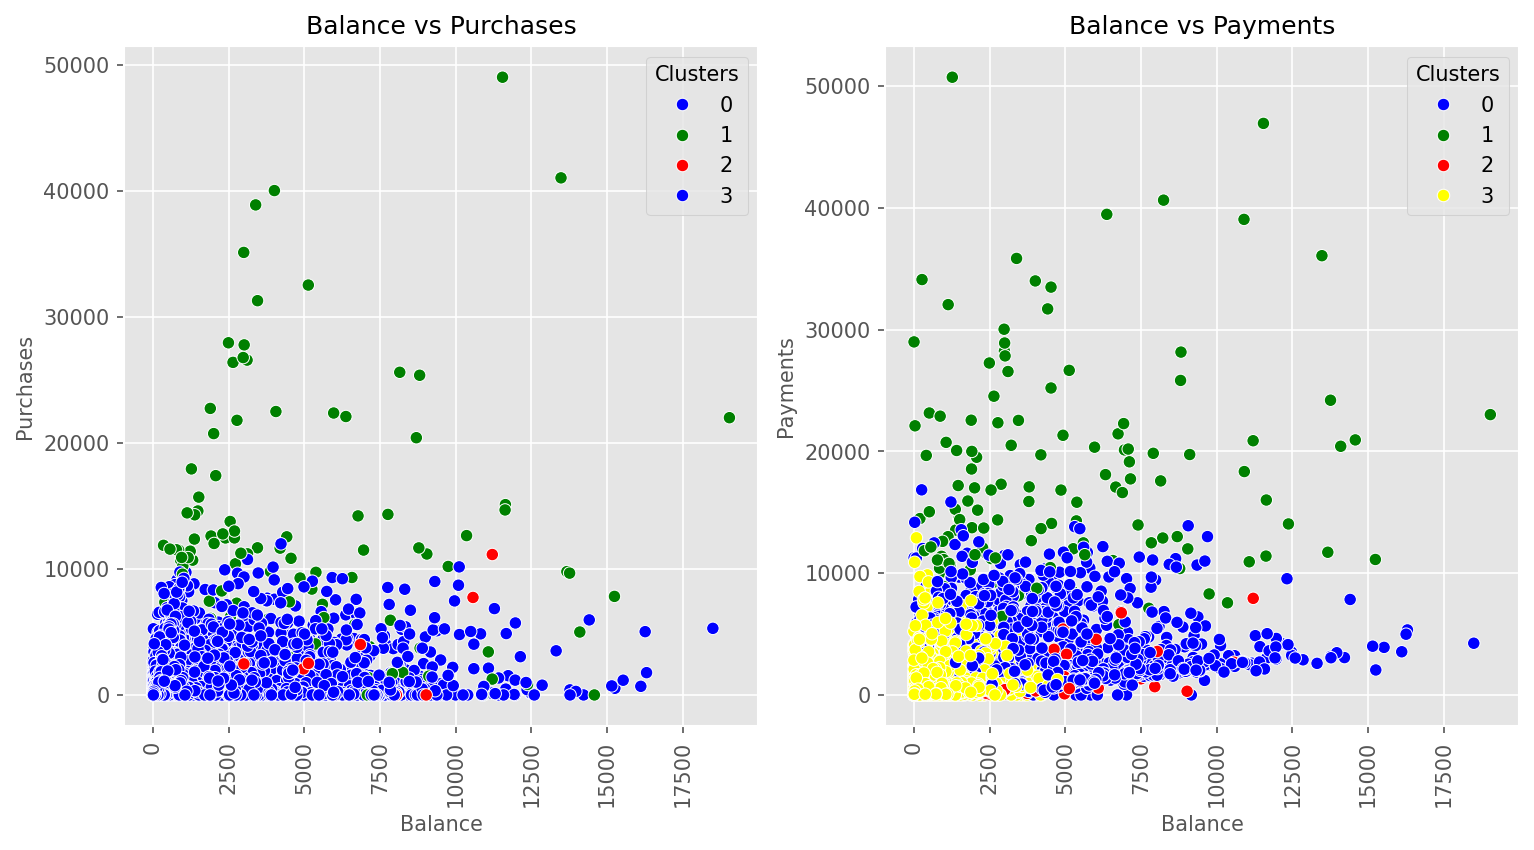

In [30]:
fig = plt.figure (figsize = (12 , 6) , dpi = 150)

plt.subplot (1 , 2 , 1)
sns.scatterplot (x='Balance' , y='Purchases' , hue = 'Clusters' , palette=['blue','green','red'], data=df_with_clusters)
plt.title('Balance vs Purchases' , fontsize = 12)
plt.xticks (rotation = 90 , fontsize=10)
plt.yticks (fontsize=10)
plt.xlabel ('Balance' , fontsize=10)
plt.ylabel ('Purchases' , fontsize=10)


plt.subplot (1 , 2 , 2)
sns.scatterplot (x='Balance' , y='Payments' , hue = 'Clusters' , palette=['blue','green','red', 'yellow'], data=df_with_clusters)
plt.title('Balance vs Payments' , fontsize = 12)
plt.xticks (rotation = 90 , fontsize=10)
plt.yticks (fontsize=10)
plt.xlabel ('Balance' , fontsize=10)
plt.ylabel ('Payments' , fontsize=10)


Text(0, 0.5, 'Purchases')

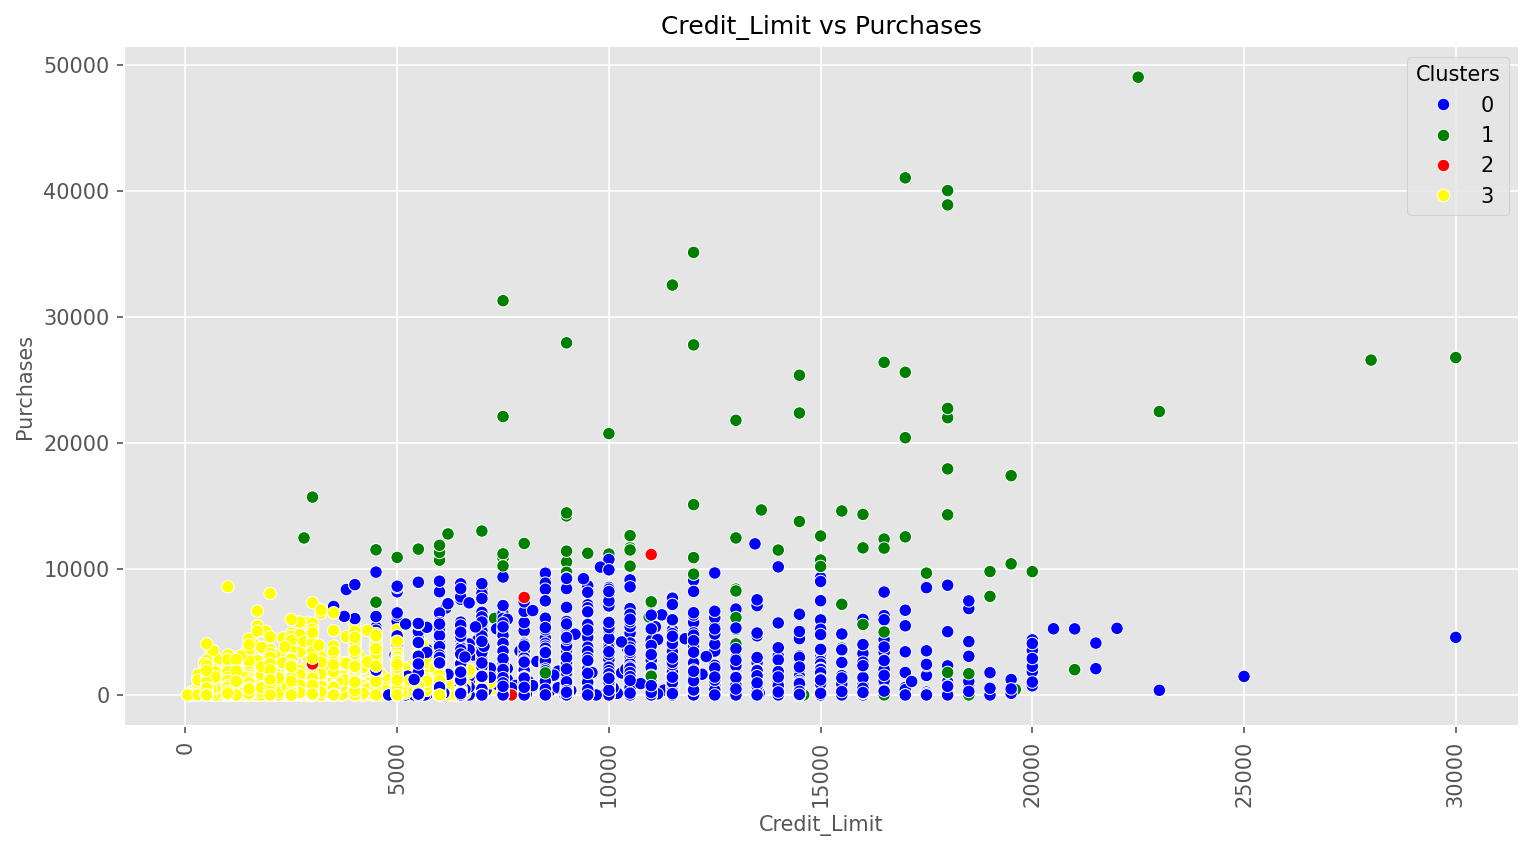

In [33]:
fig = plt.figure (figsize = (12 , 6) , dpi = 150)

sns.scatterplot (x='Credit_Limit' , y='Purchases' , hue = 'Clusters' , palette=['blue','green','red','yellow'], data=df_with_clusters)
plt.title('Credit_Limit vs Purchases' , fontsize = 12)
plt.xticks (rotation = 90 , fontsize=10)
plt.yticks (fontsize=10)
plt.xlabel ('Credit_Limit' , fontsize=10)
plt.ylabel ('Purchases' , fontsize=10)

In [34]:
df_with_clusters.to_csv('../Data/Kmeans_Clusters.csv')